# DEEPLEARNING
## Keras

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import pandas as pd
from functions import pathfile

In [2]:
pf=pathfile()
df=pd.read_csv(pf)

C:\Users\ingva\OneDrive\Documents\EstudioML\data\raw\winequality-red.csv


In [3]:

df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#modelo
input_shape=[len(df.iloc[:,0:11].columns)]
model= keras.Sequential([layers.Dense(units=1,input_shape=input_shape)])
w, b = model.weights

print("Weights\n{}\n\nBias\n{}".format(w, b))


Weights
<KerasVariable shape=(11, 1), dtype=float32, path=sequential/dense/kernel>

Bias
<KerasVariable shape=(1,), dtype=float32, path=sequential/dense/bias>


c:\Users\ingva\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.get_weights()


[array([[ 0.699138  ],
        [ 0.30323154],
        [-0.4723918 ],
        [-0.25858238],
        [ 0.00223058],
        [ 0.28911692],
        [ 0.6124502 ],
        [-0.3641631 ],
        [ 0.23932159],
        [ 0.347956  ],
        [ 0.1657275 ]], dtype=float32),
 array([0.], dtype=float32)]

# Stochastic Gradient Descent

In [7]:
#creamos training y valid data
df_train=df.sample(frac=0.7,random_state=0)
df_valid=df.drop(df_train.index)

#scale 0.1
max_=df_train.max(axis=0)
min_=df_valid.min(axis=0)
df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)

#splits
X_train=df_train.drop('quality',axis=1)
X_valid=df_valid.drop('quality',axis=1)
y_train=df_train['quality']
y_valid=df_valid['quality']



In [11]:
from tensorflow.keras import layers, callbacks

early_stopping=callbacks.EarlyStopping(
    min_delta= 0.001, #minium amount of change to count as improvement
    patience=20,
    restore_best_weights=True
)

In [12]:

#creamos el modelo
model2=keras.Sequential([layers.Dense(512,activation='relu',input_shape=input_shape),
                         layers.Dense(512,activation='relu'),
                         layers.Dense(512,activation='relu'),
                         layers.Dense(1)])
model2.compile( optimizer='adam',loss='mae')

c:\Users\ingva\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history=model2.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=256,epochs=10, callbacks=[early_stopping])

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3881 - val_loss: 0.1490
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1544 - val_loss: 0.1419
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1332 - val_loss: 0.1295
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1256 - val_loss: 0.1250
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1170 - val_loss: 0.1088
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1103 - val_loss: 0.1121
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1071 - val_loss: 0.1035
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1032 - val_loss: 0.1038
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1018 - val_loss: 0.1043
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1006 - val_loss: 0.1002


Minimum validation loss: 0.10016182065010071


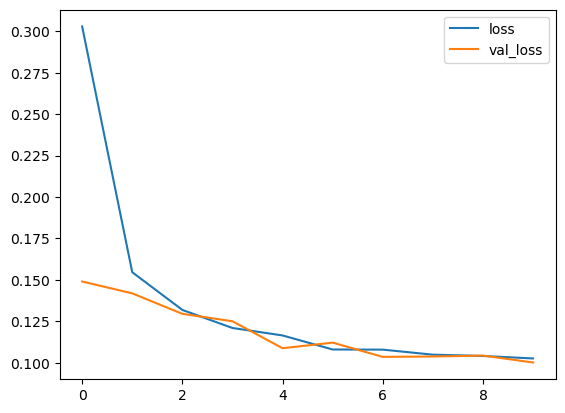

In [15]:
from IPython.display import display

history_df=pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))